## ML WORKFLOW

#### 1. PREPARE DATA

Import

Explore

Split

#### 2. BUILD MODEL

Baseline

Iterate

Evaluate

#### 3. COMMUNICATE RESULT

#### 1. PREPARE DATA

In [1]:
#importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import(ConfusionMatrixDisplay,classification_report, confusion_matrix)
from teaching_tools.widgets import ConfusionMatrixWidget


# To get diferent metric scores
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer
from imblearn.under_sampling import RandomUnderSampler
# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
#load datasets
application_train= pd.read_csv("application_train.csv/application_train.csv", index_col = 0)
column_desc = pd.read_csv("application_train.csv/column_description.csv", encoding='Latin-1')
application_test= pd.read_csv("application_test.csv/application_test.csv", index_col = 0)

In [3]:
application_train.head()


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
application_train.shape


(307511, 121)

In [5]:
application_train.info()
#checking for missing values
missing_percentage = application_train.isnull().sum() * 100 / len(application_train)
#unique count
unique_count = application_train.nunique()
#data type
column_types = application_train.dtypes

#putting them in a df
summary = pd.DataFrame({
    'missing_percentage': missing_percentage,
    'unique_count': unique_count,
    'type': column_types
})

(
    summary
    .head(summary.shape[0])
    .sort_values(
        ['missing_percentage', 'unique_count'],
        ascending = [True, True]).style.set_properties(**{'text-align': 'center'})
)
    


<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 286.2+ MB


,missing_percentage,unique_count,type
TARGET,0.000000,2,int64
NAME_CONTRACT_TYPE,0.000000,2,object
FLAG_OWN_CAR,0.000000,2,object
FLAG_OWN_REALTY,0.000000,2,object
FLAG_MOBIL,0.000000,2,int64
FLAG_EMP_PHONE,0.000000,2,int64
FLAG_WORK_PHONE,0.000000,2,int64
FLAG_CONT_MOBILE,0.000000,2,int64
FLAG_PHONE,0.000000,2,int64
FLAG_EMAIL,0.000000,2,int64


In [6]:
# Drop columns having more than 50% missing values
application_train.dropna(thresh=application_train.shape[0] * 0.5, axis=1, inplace=True)


missing_percentage

TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 121, dtype: float64

In [7]:
application_test.dropna(thresh=application_test.shape[0] * 0.5, axis=1, inplace=True)

In [8]:
# Number of each type of column
application_train.dtypes.value_counts()

int64      40
float64    27
object     13
dtype: int64

In [9]:
# Number of unique classes in each object column
application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
EMERGENCYSTATE_MODE            2
dtype: int64

In [10]:
application_train.select_dtypes('int').describe()

,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.417052,-16036.995067,63815.045904,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,...,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
std,0.272419,0.722121,4363.988632,141275.766519,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,...,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299
min,0.000000,0.000000,-25229.000000,-17912.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-19682.000000,-2760.000000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,-15750.000000,-1213.000000,-3254.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,-12413.000000,-289.000000,-1720.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,19.000000,-7489.000000,365243.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
(application_train.loc[:,['DAYS_EMPLOYED','DAYS_BIRTH','DAYS_ID_PUBLISH',"DAYS_REGISTRATION"]]/365).describe()

,DAYS_EMPLOYED,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,174.835742,-43.936973,-8.203294,-13.660604
std,387.056895,11.956133,4.135481,9.651743
min,-49.073973,-69.120548,-19.717808,-67.594521
25%,-7.561644,-53.923288,-11.778082,-20.491781
50%,-3.323288,-43.150685,-8.915068,-12.339726
75%,-0.791781,-34.008219,-4.712329,-5.506849
max,1000.665753,-20.517808,0.000000,0.000000


The negative values, may be because the logic itself was to subtract NOW time from DOB time.

##### Feature Engineering

In [12]:
#converting all the days to years
application_train["YEARS_EMPLOYED"]= application_train["DAYS_EMPLOYED"]/-365
application_train["YEARS_BIRTH"]= application_train["DAYS_BIRTH"]/-365
application_train["YEARS_ID_PUBLISH"]= application_train["DAYS_ID_PUBLISH"]/-365
application_train["YEARS_REGISTRATION"]= application_train["DAYS_REGISTRATION"]/-365

In [13]:
#converting all the days to years
application_test["YEARS_EMPLOYED"]= application_test["DAYS_EMPLOYED"]/-365
application_test["YEARS_BIRTH"]= application_test["DAYS_BIRTH"]/-365
application_test["YEARS_ID_PUBLISH"]= application_test["DAYS_ID_PUBLISH"]/-365
application_test["YEARS_REGISTRATION"]= application_test["DAYS_REGISTRATION"]/-365

In [14]:
application_train.drop(["DAYS_EMPLOYED","DAYS_BIRTH","DAYS_ID_PUBLISH","DAYS_REGISTRATION"], axis=1, inplace= True)
application_test.drop(["DAYS_EMPLOYED","DAYS_BIRTH","DAYS_ID_PUBLISH","DAYS_REGISTRATION"], axis=1, inplace= True)

In [15]:
application_train.loc[:,['YEARS_EMPLOYED','YEARS_BIRTH','YEARS_ID_PUBLISH','YEARS_REGISTRATION']].describe()

,YEARS_EMPLOYED,YEARS_BIRTH,YEARS_ID_PUBLISH,YEARS_REGISTRATION
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,-174.835742,43.936973,8.203294,13.660604
std,387.056895,11.956133,4.135481,9.651743
min,-1000.665753,20.517808,-0.000000,-0.000000
25%,0.791781,34.008219,4.712329,5.506849
50%,3.323288,43.150685,8.915068,12.339726
75%,7.561644,53.923288,11.778082,20.491781
max,49.073973,69.120548,19.717808,67.594521


    We can see there are outliers in YEARS_EMPLOYED column, we will remove the outlier using IQR proximity rule..

In [16]:
#Finding the IQR
percentile25 = application_train['YEARS_EMPLOYED'].quantile(0.25)
percentile75 = application_train['YEARS_EMPLOYED'].quantile(0.75)

IQR = percentile75 - percentile25

#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

#Finding Outliers

application_train[application_train['YEARS_EMPLOYED'] > upper_limit]
application_train[application_train['YEARS_EMPLOYED'] < lower_limit]

#Trimming

app_train = application_train.loc[(application_train['YEARS_EMPLOYED'] < upper_limit) & (application_train['YEARS_EMPLOYED'] > lower_limit)]
application_train.shape

(307511, 80)

In [17]:
app_train.loc[:,['YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_BIRTH','YEARS_ID_PUBLISH']].describe()

,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_BIRTH,YEARS_ID_PUBLISH
count,235294.000000,235294.000000,235294.000000,235294.000000
mean,5.244711,12.372054,39.790012,7.644868
std,4.104200,8.739816,9.887790,4.146540
min,-0.000000,-0.000000,20.517808,-0.000000
25%,1.967123,4.854795,31.747945,4.046575
50%,4.139726,11.405479,39.043836,7.852055
75%,7.646575,18.479452,47.189041,11.416438
max,17.715068,62.194521,68.986301,19.717808


In [18]:
app_train.select_dtypes('float').describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_EMPLOYED,YEARS_BIRTH,YEARS_ID_PUBLISH,YEARS_REGISTRATION
count,2.352940e+05,2.352940e+05,235282.000000,2.350500e+05,235294.000000,235292.000000,2.348220e+05,187542.000000,120489.000000,118166.000000,...,202864.000000,202864.000000,202864.000000,202864.000000,202864.000000,202864.000000,235294.000000,235294.000000,235294.000000,235294.000000
mean,1.758691e+05,6.061084e+05,27751.165410,5.445065e+05,0.020941,2.266426,5.138338e-01,0.496274,0.977505,0.227855,...,0.006610,0.007093,0.034319,0.279434,0.261377,1.863490,5.244711,39.790012,7.644868,12.372054
std,2.658974e+05,4.039078e+05,14614.976601,3.707466e+05,0.013945,0.950980,1.904606e-01,0.196431,0.061009,0.146387,...,0.085302,0.112266,0.204081,0.942082,0.839045,1.829171,4.104200,9.887790,4.146540,8.739816
min,2.565000e+04,4.500000e+04,1980.000000,4.050000e+04,0.000290,1.000000,8.173617e-08,0.000527,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,20.517808,-0.000000,-0.000000
25%,1.125000e+05,2.747790e+05,16996.500000,2.475000e+05,0.010006,2.000000,3.945358e-01,0.352340,0.976700,0.166700,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.967123,31.747945,4.046575,4.854795
50%,1.575000e+05,5.212800e+05,25803.000000,4.500000e+05,0.018850,2.000000,5.646180e-01,0.517297,0.981600,0.166700,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.139726,39.043836,7.852055,11.405479
75%,2.115000e+05,8.140410e+05,35554.500000,6.885000e+05,0.028663,3.000000,6.623663e-01,0.654529,0.986600,0.333300,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,7.646575,47.189041,11.416438,18.479452
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,20.000000,8.549997e-01,0.893976,1.000000,1.000000,...,4.000000,9.000000,8.000000,27.000000,261.000000,23.000000,17.715068,68.986301,19.717808,62.194521


##### Split to categorical and numerical features

In [19]:
def feature_type_split(data):
    cat_list_train = []
    dis_num_list_train = []
    num_list_train = []
    for i in data.columns.tolist():
        if data[i].dtype == 'object':
            cat_list_train.append(i)
        elif data[i].nunique() < 25:
            dis_num_list_train.append(i)
        else:
            num_list_train.append(i)
    return cat_list_train, dis_num_list_train,  num_list_train

cat_list_train, dis_num_list_train,  num_list_train = feature_type_split(application_train)

In [20]:
def feature_type_split(d):
    cat_list = []
    dis_num_list = []
    num_list = []
    for i in d.columns.tolist():
        if d[i].dtype == 'object':
            cat_list.append(i)
        elif d[i].nunique() < 25:
            dis_num_list.append(i)
        else:
            num_list.append(i)
    return cat_list, dis_num_list, num_list

cat_list, dis_num_list, num_list = feature_type_split(application_test) 

In [21]:
df_numeric = app_train[num_list_train]
df_categorical = app_train[cat_list_train]
df_d_numeric = app_train[dis_num_list_train]

print("num_list",len(num_list_train))
print("cat_list",len(cat_list_train))
print("dis_num_list",len(dis_num_list_train))

num_list 22
cat_list 13
dis_num_list 45


#### Imputing missing values

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
#category
app_train[cat_list_train] = SimpleImputer(strategy='most_frequent').fit_transform(app_train[cat_list_train])

#Discrete
app_train[dis_num_list_train] = SimpleImputer(strategy='most_frequent').fit_transform(app_train[dis_num_list_train])

# continuous 
app_train[num_list_train] = SimpleImputer(strategy='median').fit_transform(app_train[num_list_train])



In [24]:
#for test

#category
application_test[cat_list] = SimpleImputer(strategy='most_frequent').fit_transform(application_test[cat_list])

#Discrete
application_test[dis_num_list] = SimpleImputer(strategy='most_frequent').fit_transform(application_test[dis_num_list])

# continuous 
application_test[num_list] = SimpleImputer(strategy='median').fit_transform(application_test[num_list])

###### Distribution of target

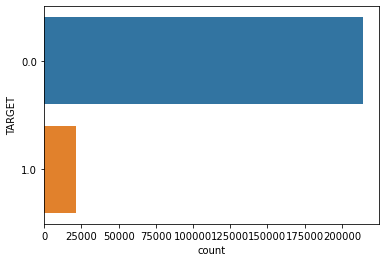

In [25]:
sns.countplot(data = app_train,y ='TARGET')
plt.show()

From the plot we can see that the data is imbalance, mostly contains debtors that don't have payment difficulty.

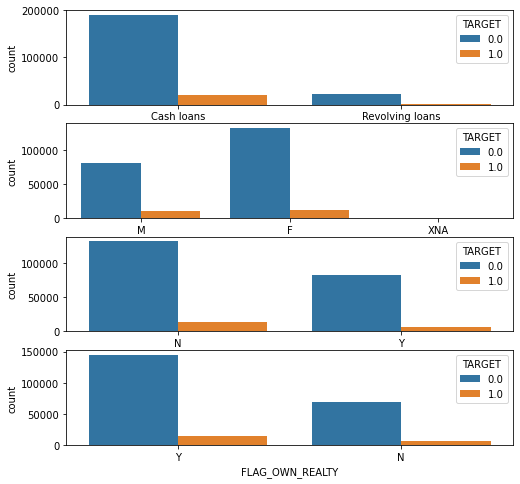

In [26]:
#Using seaborns countplot and subplot
fig, ax = plt.subplots(nrows=4, figsize = [8,8])
#Setting my base color 
base_color = sns.color_palette()[0]
sns.countplot(data = app_train,x='NAME_CONTRACT_TYPE',hue='TARGET', ax = ax[0])
sns.countplot(data = app_train,x='CODE_GENDER',hue='TARGET', ax = ax[1])
sns.countplot(data = app_train,x='FLAG_OWN_CAR',hue='TARGET', ax = ax[2])
sns.countplot(data = app_train,x='FLAG_OWN_REALTY',hue='TARGET', ax = ax[3])

plt.show()

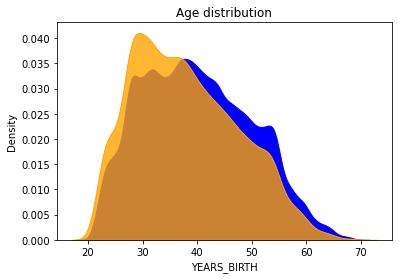

In [27]:
sns.kdeplot(data = app_train[app_train['TARGET'] == 0], x = "YEARS_BIRTH", shade = True,  alpha = 1, color = 'blue' ).set(title= "Age distribution")
sns.kdeplot(data = app_train[app_train['TARGET'] == 1], x = "YEARS_BIRTH", shade = True,  alpha = 0.8, color = 'orange');

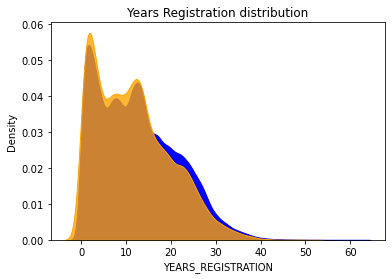

In [28]:
sns.kdeplot(data = app_train[app_train['TARGET'] == 0], x = "YEARS_REGISTRATION", shade = True,  alpha = 1, color = 'blue' ).set(title= "Years Registration distribution")
sns.kdeplot(data = app_train[app_train['TARGET'] == 1], x = "YEARS_REGISTRATION", shade = True,  alpha = 0.8, color = 'orange');

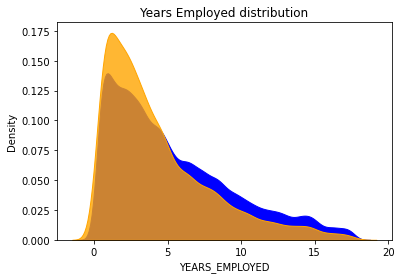

In [29]:
sns.kdeplot(data = app_train[app_train['TARGET'] == 0], x = "YEARS_EMPLOYED", shade = True,  alpha = 1, color = 'blue' ).set(title= "Years Employed distribution")
sns.kdeplot(data = app_train[app_train['TARGET'] == 1], x = "YEARS_EMPLOYED", shade = True,  alpha = 0.8, color = 'orange');

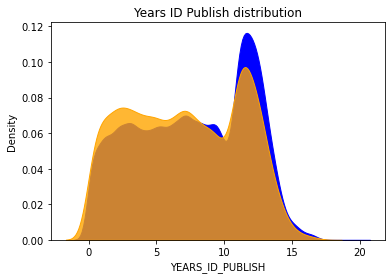

In [30]:
sns.kdeplot(data = app_train[app_train['TARGET'] == 0], x = "YEARS_ID_PUBLISH", shade = True,  alpha = 1, color = 'blue' ).set(title= "Years ID Publish distribution")
sns.kdeplot(data = app_train[app_train['TARGET'] == 1], x = "YEARS_ID_PUBLISH", shade = True,  alpha = 0.8, color = 'orange');

In [31]:
# Find correlation with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Postive Correlations:\n', correlations.tail(20))
print('\nMost Negative Correlations:\n', correlations.head(20))

Most Postive Correlations:
 FLAG_MOBIL                     0.000647
FLAG_CONT_MOBILE               0.001028
REG_REGION_NOT_LIVE_REGION     0.003347
FLAG_DOCUMENT_21               0.003388
CNT_CHILDREN                   0.004648
FLAG_DOCUMENT_2                0.004799
OBS_60_CNT_SOCIAL_CIRCLE       0.010604
OBS_30_CNT_SOCIAL_CIRCLE       0.010670
AMT_REQ_CREDIT_BUREAU_YEAR     0.015841
FLAG_WORK_PHONE                0.019362
LIVE_CITY_NOT_WORK_CITY        0.022953
DEF_60_CNT_SOCIAL_CIRCLE       0.033599
DEF_30_CNT_SOCIAL_CIRCLE       0.035716
REG_CITY_NOT_LIVE_CITY         0.040228
REG_CITY_NOT_WORK_CITY         0.041276
FLAG_DOCUMENT_3                0.043387
DAYS_LAST_PHONE_CHANGE         0.060362
REGION_RATING_CLIENT           0.067486
REGION_RATING_CLIENT_W_CITY    0.069607
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_2                 -0.172541
EXT_SOURCE_3                 -0.156325
YEARS_EMPLOYED               -0.070

In [32]:
#drop columns with no importance
app_train = app_train.drop(['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_9',
                            'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
                            'FLAG_DOCUMENT_17','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_DOCUMENT_4',
                            'FLAG_DOCUMENT_2','OCCUPATION_TYPE','LIVE_REGION_NOT_WORK_REGION',
                            'REG_CITY_NOT_WORK_CITY','NAME_HOUSING_TYPE','OBS_60_CNT_SOCIAL_CIRCLE','WEEKDAY_APPR_PROCESS_START',
                            'NAME_FAMILY_STATUS','NAME_TYPE_SUITE','ORGANIZATION_TYPE','FLAG_MOBIL','NAME_INCOME_TYPE',
                           'FLAG_CONT_MOBILE','NAME_EDUCATION_TYPE','EMERGENCYSTATE_MODE','CNT_CHILDREN','FLOORSMAX_MEDI',
                            'REG_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','FLAG_CONT_MOBILE','FLAG_EMP_PHONE','REG_REGION_NOT_LIVE_REGION'], axis = 1)

In [35]:
application_test = application_test.drop(['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_9',
                            'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
                            'FLAG_DOCUMENT_17','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_DOCUMENT_4',
                            'FLAG_DOCUMENT_2','OCCUPATION_TYPE','LIVE_REGION_NOT_WORK_REGION',
                            'REG_CITY_NOT_WORK_CITY','NAME_HOUSING_TYPE','OBS_60_CNT_SOCIAL_CIRCLE','WEEKDAY_APPR_PROCESS_START',
                            'NAME_FAMILY_STATUS','NAME_TYPE_SUITE','ORGANIZATION_TYPE','FLAG_MOBIL','NAME_INCOME_TYPE',
                           'FLAG_CONT_MOBILE','NAME_EDUCATION_TYPE','EMERGENCYSTATE_MODE','CNT_CHILDREN','FLOORSMAX_MEDI',
                            'REG_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','FLAG_CONT_MOBILE','FLAG_EMP_PHONE','REG_REGION_NOT_LIVE_REGION'], axis = 1)

In [33]:
#Create dummies/one-hot encoding on every nominal attributes in train dataframe
CODE_GENDER_dummies = pd.get_dummies(app_train['CODE_GENDER'],prefix='CODE_GENDER')
NAME_CONTRACT_TYPE_dummies = pd.get_dummies(app_train['NAME_CONTRACT_TYPE'],prefix='NAME_CONTRACT_TYPE')
FLAG_OWN_CAR_dummies = pd.get_dummies(app_train['FLAG_OWN_CAR'],prefix='FLAG_OWN_CAR')
FLAG_OWN_REALTY_dummies = pd.get_dummies(app_train['FLAG_OWN_REALTY'],prefix='FLAG_OWN_REALTY')



In [36]:
#Create dummies/one-hot encoding on every nominal attributes in train dataframe
CODE_GENDER_dummies = pd.get_dummies(application_test['CODE_GENDER'],prefix='CODE_GENDER')
NAME_CONTRACT_TYPE_dummies = pd.get_dummies(application_test['NAME_CONTRACT_TYPE'],prefix='NAME_CONTRACT_TYPE')
FLAG_OWN_CAR_dummies = pd.get_dummies(application_test['FLAG_OWN_CAR'],prefix='FLAG_OWN_CAR')
FLAG_OWN_REALTY_dummies = pd.get_dummies(application_test['FLAG_OWN_REALTY'],prefix='FLAG_OWN_REALTY')



In [34]:
#Concate the dummies into train dataset
app_train = pd.concat([app_train, CODE_GENDER_dummies,NAME_CONTRACT_TYPE_dummies,
                       FLAG_OWN_CAR_dummies,FLAG_OWN_REALTY_dummies], axis=1)

#Drop categorical attribute (before transformation)
app_train = app_train.drop(['CODE_GENDER','NAME_CONTRACT_TYPE','FLAG_OWN_CAR',
                                             'FLAG_OWN_REALTY','CODE_GENDER_XNA'], axis=1)

In [37]:
#Concate the dummies into train dataset
app_test = pd.concat([application_test, CODE_GENDER_dummies,NAME_CONTRACT_TYPE_dummies,
                       FLAG_OWN_CAR_dummies,FLAG_OWN_REALTY_dummies], axis=1)

#Drop categorical attribute (before transformation)
app_test = app_test.drop(['CODE_GENDER','NAME_CONTRACT_TYPE','FLAG_OWN_CAR',
                                             'FLAG_OWN_REALTY'], axis=1)

In [38]:
#Getting just columns in train
common_cols = [col for col in set(app_train).intersection(app_test)]

In [39]:
app_test = app_train[common_cols]

In [40]:
app_train.head()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,YEARS_ID_PUBLISH,YEARS_REGISTRATION,CODE_GENDER_F,CODE_GENDER_M,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1.0,202500.0,406597.5,24700.5,351000.0,0.018801,0.0,1.0,0.0,1.0,...,5.808219,9.994521,0,1,1,0,1,0,0,1
100003,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,0.0,1.0,0.0,2.0,...,0.797260,3.249315,1,0,1,0,1,0,1,0
100004,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,1.0,1.0,0.0,1.0,...,6.934247,11.671233,0,1,0,1,0,1,0,1
100006,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,0.0,0.0,0.0,2.0,...,6.676712,26.939726,1,0,1,0,1,0,0,1
100007,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,0.0,0.0,0.0,1.0,...,9.473973,11.810959,0,1,1,0,1,0,0,1


###### SPLITTING

In [41]:
y = app_train['TARGET']
X = app_train.drop(columns="TARGET")

In [42]:
print(X.shape)
print(y.shape)

(235294, 46)
(235294,)


In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(188235, 46)
(188235,)
(47059, 46)
(47059,)


In [45]:
Under_sampler = RandomUnderSampler(random_state= 1)
X_train_under, y_train_under = Under_sampler.fit_resample(X_train,y_train)
print(X_train_under.shape)
print(y_train_under.shape)

(33660, 46)
(33660,)


#### 2. BUILD MODEL

In [46]:
acc_baseline= y_train_under.value_counts(normalize=True).max()
print(acc_baseline)

0.5


In [47]:
X_train_under.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,...,YEARS_ID_PUBLISH,YEARS_REGISTRATION,CODE_GENDER_F,CODE_GENDER_M,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y
0,225000.0,417024.0,21964.5,360000.0,0.008019,0.0,0.0,0.0,2.0,2.0,...,8.260274,9.852055,0,1,1,0,1,0,0,1
1,202500.0,601470.0,29065.5,450000.0,0.008068,0.0,0.0,1.0,1.0,3.0,...,3.602740,12.558904,0,1,1,0,1,0,0,1
2,202500.0,454500.0,14791.5,454500.0,0.008625,0.0,0.0,0.0,2.0,2.0,...,8.643836,2.054795,1,0,1,0,1,0,0,1
3,270000.0,675000.0,48136.5,675000.0,0.006629,0.0,1.0,0.0,1.0,2.0,...,0.575342,36.419178,1,0,1,0,1,0,1,0
4,157500.0,808650.0,26217.0,675000.0,0.022800,0.0,0.0,0.0,4.0,2.0,...,8.301370,4.509589,1,0,1,0,1,0,0,1


In [48]:
GB_clf =  GradientBoostingClassifier()
GB_clf.fit(X_train_under, y_train_under)
y_pred = GB_clf.predict(X_val)

In [49]:
acc_train = GB_clf.score(X_train_under, y_train_under)
acc_test=accuracy_score(y_val, y_pred)
GB_rocauc=roc_auc_score(y_val,y_pred)
print('{:.4f}'.format(acc_train), '- acc_train')
print('{:.4f}'.format(acc_test), '- acc_test')
print('{:.4f}'.format(GB_rocauc), '- GB ROC AUC')

0.6855 - acc_train
0.6871 - acc_test
0.6873 - GB ROC AUC


In [50]:
# Creating metric function 
def metrics_score(model, features, labels):
    predicted = model.predict(features)
    print(classification_report(labels, predicted))

    plot_confusion_matrix(model, features, labels)
    plt.grid(b=None)

    plt.show()

              precision    recall  f1-score   support

         0.0       0.68      0.69      0.69     16830
         1.0       0.69      0.68      0.68     16830

    accuracy                           0.69     33660
   macro avg       0.69      0.69      0.69     33660
weighted avg       0.69      0.69      0.69     33660



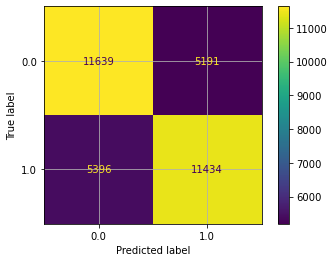

In [51]:
metrics_score(GB_clf, X_train_under, y_train_under)

              precision    recall  f1-score   support

         0.0       0.96      0.69      0.80     42790
         1.0       0.18      0.69      0.28      4269

    accuracy                           0.69     47059
   macro avg       0.57      0.69      0.54     47059
weighted avg       0.89      0.69      0.75     47059



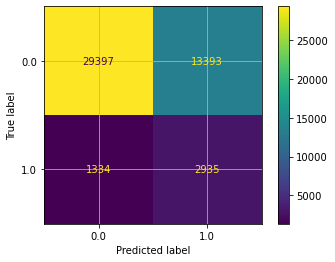

In [52]:
metrics_score(GB_clf, X_val, y_val)

In [53]:
c = ConfusionMatrixWidget(GB_clf, X_val,y_val)
c.show()

FloatSlider(value=0.5, continuous_update=False, description='Threshold:', max=1.0)

#### 3. COMMUNICATE RESULT

<AxesSubplot:>

<Figure size 936x936 with 0 Axes>

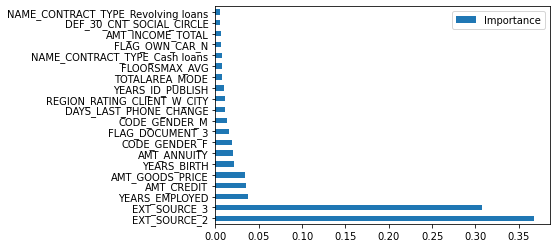

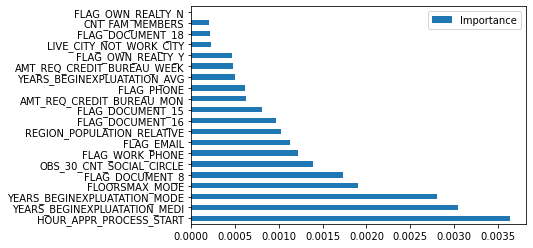

In [54]:
# Getting feature importance
importances = GB_clf.feature_importances_

features = X_train.columns

importance_df = pd.DataFrame(importances, index = features, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

#sns.barplot(importance_df.head(10).Importance,importance_df.index)
importance_df.head(20).plot(kind="barh")
importance_df.tail(20).plot(kind="barh")     

In [55]:
predictions = GB_clf.predict_proba(app_test)[:, 1]
predictions

array([0.13369752, 0.14331859, 0.24160422, ..., 0.11008867, 0.17473844,
       0.12736731])

In [56]:
app_test["SK_ID_CURR"]=app_test.index

In [57]:
app_test["TARGET"]= predictions
app_test[['SK_ID_CURR', 'TARGET']].to_csv('submission.csv', index=False)
print('a submission file is created')


a submission file is created
